In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riduvarshiniim","key":"04fdce96d6fad471bf65ad6c9ef4881c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d atulyakumar98/test-dataset -p /content


Dataset URL: https://www.kaggle.com/datasets/atulyakumar98/test-dataset
License(s): unknown
 75% 99.0M/132M [00:00<00:00, 1.04GB/s]
100% 132M/132M [00:00<00:00, 941MB/s]  


In [5]:
!unzip -q test-dataset.zip -d/content/test-dataset

In [10]:
!ls /content/test-dataset

Fire-Detection


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

# Path to your dataset folder
data_dir = '/content/test-dataset/Fire-Detection'

# Load dataset (train-test split done automatically)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),  # resize images to 128x128
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)


Found 651 files belonging to 2 classes.
Using 521 files for training.
Found 651 files belonging to 2 classes.
Using 130 files for validation.


In [14]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7281 - loss: 0.4602 - val_accuracy: 0.8538 - val_loss: 0.2723
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8481 - loss: 0.3259 - val_accuracy: 0.8615 - val_loss: 0.2599
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8824 - loss: 0.2817 - val_accuracy: 0.9308 - val_loss: 0.2304
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9039 - loss: 0.2454 - val_accuracy: 0.8923 - val_loss: 0.2356
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9192 - loss: 0.1924 - val_accuracy: 0.9538 - val_loss: 0.1700
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9549 - loss: 0.1384 - val_accuracy: 0.9308 - val_loss: 0.2513
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9443 - loss: 0.1424 - val_accuracy: 0.9308 - val_loss: 0.1969
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9637 - loss: 0.1074 - val_accuracy: 0.8231 - val_loss: 0.3354
Epo

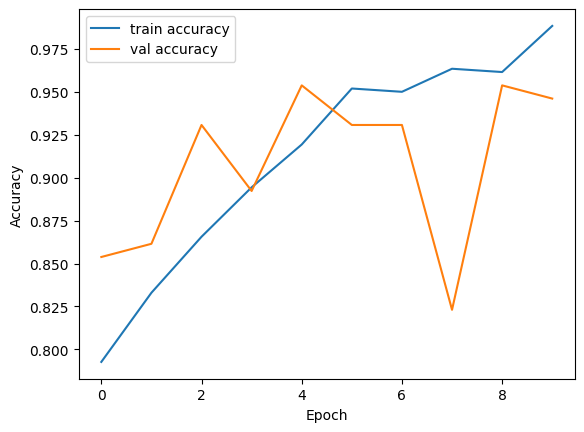

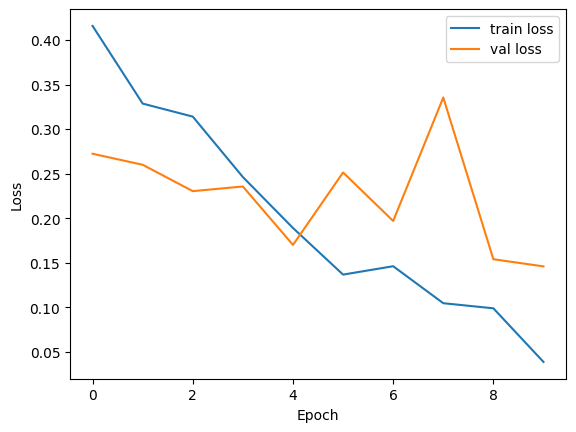

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
ann_model = tf.keras.Sequential([
    tf.keras.layers.Resizing(64, 64),  # Resize images smaller to speed up training
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_ann = ann_model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.7949 - loss: 0.5913 - val_accuracy: 0.8462 - val_loss: 0.3958
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.8343 - loss: 0.4130 - val_accuracy: 0.8462 - val_loss: 0.3841
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.8268 - loss: 0.4120 - val_accuracy: 0.8462 - val_loss: 0.3757
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.8258 - loss: 0.4065 - val_accuracy: 0.8462 - val_loss: 0.3620
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.8413 - loss: 0.3700 - val_accuracy: 0.8462 - val_loss: 0.3485
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.8122 - loss: 0.4079 - val_accuracy: 0.8462 - val_loss: 0.3361
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.8642 - loss: 0.3545 - val_accuracy: 0.8692 - val_loss: 0.3234
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.8782 - loss: 0.3340 - val_accuracy: 0.8923 - val_

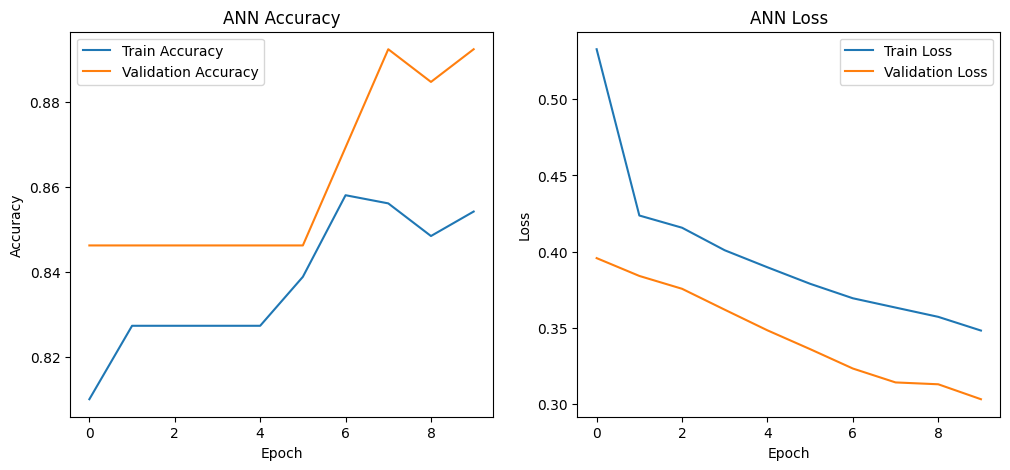

In [18]:


# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
